In [ ]:
import torch
from torchvision import datasets
import matplotlib.pyplot as plt

In [ ]:
mnist = datasets.MNIST('./data',download=True)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
type(mnist)

torchvision.datasets.mnist.MNIST

In [ ]:
threes = mnist.data[(mnist.targets==3)]/255
sevens = mnist.data[(mnist.targets==7)]/255

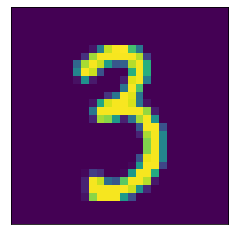

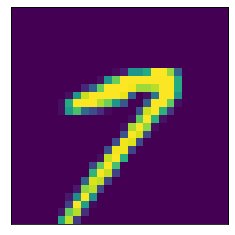

In [ ]:
def show_img(img):
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.show()
show_img(threes[10])
show_img(sevens[5])

In [ ]:
combined_data = torch.cat([threes,sevens])
combined_data.shape

torch.Size([12396, 28, 28])

In [ ]:
flat_imgs = combined_data.view((-1,28*28))
flat_imgs.shape

torch.Size([12396, 784])

In [ ]:
#Create Ground Truth labels
target = torch.tensor([1]*len(threes)+[2]*len(sevens))
target.shape

torch.Size([12396])

In [ ]:
# Defining the Neural Network
def sigmoid(x): return 1/(1+torch.exp(-x))
def simple_nn(data,weights,bias): return sigmoid((data@weights)+bias)


In [ ]:
# Defining the loss
def error(pred,target): return ((pred-target)**2).mean()

In [ ]:
# Initialise the parameteres
w = torch.randn((flat_imgs.shape[1],1), requires_grad=True)
b = torch.randn((1,1), requires_grad=True)

In [ ]:
# Training the model
for i in range(5000):
  pred = simple_nn(flat_imgs,w,b)
  loss = error(pred,target.unsqueeze(1)) #torch.unsqueeze returns a new tensor with a dimension of size one  inserted at a specific position

  #learning rate = 0.01 
  w.data -= 0.001 * (w.grad.data)
  b.data -= 0.001 * (b.grad.data)

  #Zero 
  w.grad.zero_()
  b.grad.zero_()

  print('Loss: ',loss.item())

AttributeError: ignored